# Réseaux plans et Polyèdres

In [1]:
import ccad.model as cm 
import ccad.planarnet as pn
import numpy as np
import matplotlib.pyplot as plt
from OCC.Display.WebGl import jupyter_renderer
%matplotlib inline

SMESH wrapper not found, can't display SMESH meshes


Le module **planarnet** est une extension de ccad destinée à facilite la construction des polyèdres à partir de leur représentation par un réseau plan.
Il y a un conjecture selon laquelle tout polyhèdre convexe admet un telle représentation plane. Il existe également des polyones non convexes qui admettent un telle représentation. 


Le module **planarnet** permet de paver le plan avec des polygones, et de maintenir un graphe associé dont les noeuds sont les faces du polyèdre et les arètes des connexions entre faces auxquelles sont associée une valeur angulaire de pliage :  **angle**. 


Ce notebbok illustre comment cette classe permet de générer des polygones réguliers en peu d'instructions et en indiquant un procédé de construction sous jacent. En ce sens, il est l'analogue de ce que l'on souhaite réaliser à un niveau supérieur avec des **graphes de solides** constituant un assemblage. 

# Le tétraèdre

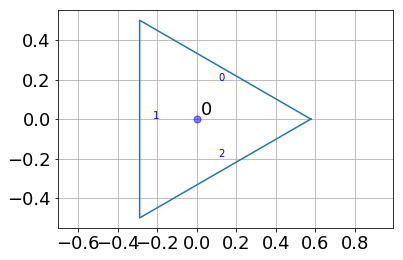

In [38]:
tetranet = pn.PlanarNet(N=3,l=1)
tetranet.plot()   

On réplique ensuite la forme du triangle équilatéral sur chaque arète du triangle 0 à l'aide de la méthode tile. 

On affecte à chaque arète la valeur angulaire qui permettra le pliage en 3 dimensions associé au numéro de l'arête.

In [39]:
alpha = np.pi - np.arccos(1/3.)
#alpha = np.pi/20
for k in range(3):
    tetranet.tile(iedge=k, angle = alpha)

In [40]:
tetranet.edge

{0: {1: {'angle': 1.9106332362490184, 'iedge': 0},
  2: {'angle': 1.9106332362490184, 'iedge': 1},
  3: {'angle': 1.9106332362490184, 'iedge': 2}},
 1: {0: {'angle': 1.9106332362490184, 'iedge': 0}},
 2: {0: {'angle': 1.9106332362490184, 'iedge': 1}},
 3: {0: {'angle': 1.9106332362490184, 'iedge': 2}}}

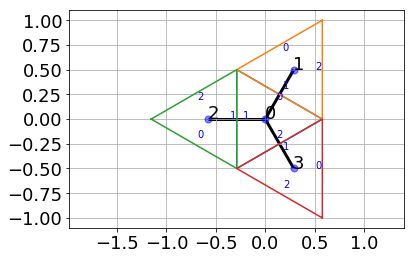

In [41]:
tetranet.plot()

In [42]:
tetrasolid = tetranet.fold()

In [43]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(tetrasolid.shape,update=True)

HBox(children=(Renderer(background='white', camera=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -2.0000399999999994, -1.2247448713915887), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), controls=[OrbitControls(controlling=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -2.0000399999999994, -1.2247448713915887), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), target=(0.14433756729740613, 2.220446049250313e-16, -0.4082482904638629)), Picker(controlling=Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': BufferAttribute(array=array([[  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16]], dtype=float32)), 'normal': BufferAttribute(array=array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  4.71404523e-01,   8.16496611e-01,  -3.33333343e-01],
       [  4.71404523e-01,   8.16496611e-01,  -3.33333343e-01],
       [  4.71404523e-01,   8.16496611e-01,  -3.33333343e-01],
       [ -9.42809045e-01,   4.88819590e-16,  -3.33333343e-01],
       [ -9.42809045e-01,   4.88819590e-16,  -3.33333343e-01],
       [ -9.42809045e-01,   4.88819590e-16,  -3.33333343e-01],
       [  4.71404523e-01,  -8.16496611e-01,  -3.33333343e-01],
       [  4.71404523e-01,  -8.16496611e-01,  -3.33333343e-01],
       [  4.71404523e-01,  -8.16496611e-01,  -3.33333343e-01]], dtype=float32)), 'index': BufferAttribute(array=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=uint32))}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'44c4c7da70ba40d6a0b58ce4ec9cb24e', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), event=u'mousedown', object=None)], scene=Scene(children=(Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': BufferAttribute(array=array([[  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16],
       [ -2.88675129e-01,   5.00000000e-01,  -1.66533454e-16],
       [ -9.61398145e-17,  -5.63297424e-17,  -8.16496611e-01],
       [  5.77350259e-01,  -5.55111512e-17,   1.66533454e-16],
       [ -2.88675129e-01,  -5.00000000e-01,   1.44218040e-16]], dtype=float32)), 'normal': 

In [44]:
dodecanet = pn.PlanarNet(N=5,l=1)
alpha = np.arctan(2)
for k in range(5):
    dodecanet.tile(iedge=k, angle = alpha)
dodecanet.tile(iface=1,iedge=3,angle=alpha)
dodecanet.tile(iface=6,iedge=1,angle=alpha)
for k in range(2,6):
    dodecanet.tile(iface=7,iedge=(k+1)%5,angle=alpha)
dodecasolid = dodecanet.fold()

In [45]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(dodecasolid.shape,update=True)

HBox(children=(Renderer(background='white', camera=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -5.236107977499793, -3.340549093234821), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), controls=[OrbitControls(controlling=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -5.236107977499793, -3.340549093234821), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), target=(1.1102230246251565e-16, -2.220446049250313e-16, -1.113516364411607)), Picker(controlling=Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(108, 3), dtype=float32>, 'normal': <BufferAttribute shape=(108, 3), dtype=float32>, 'index': <BufferAttribute shape=(108,), dtype=uint32>}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'3f7c4a6ca21c4bc0b61792d37bb8bd4b', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), event=u'mousedown', object=None)], scene=Scene(children=(Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(108, 3), dtype=float32>, 'normal': <BufferAttribute shape=(108, 3), dtype=float32>, 'index': <BufferAttribute shape=(108,), dtype=uint32>}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'3f7c4a6ca21c4bc0b61792d37bb8bd4b', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), Group(quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -5.236107977499793, -3.340549093234821), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), AmbientLight(color=u'#101010', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0))), fog=None, overrideMaterial=None, quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), shadowMap=WebGLShadowMap()), HTML(value=u'Selected shape : None')))

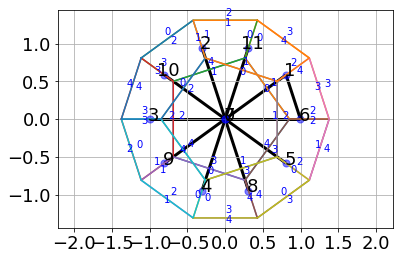

In [34]:
dodecanet.plot()

In [35]:
dodecanet

PlanarNet :12
Folded
Area : 1.720   Center : -0.000, -0.000 , 0.000
Area : 1.720   Center : 0.806, 0.585 , -0.616
Area : 1.720   Center : -0.308, 0.947 , -0.616
Area : 1.720   Center : -0.996, 0.000 , -0.616
Area : 1.720   Center : -0.308, -0.947 , -0.616
Area : 1.720   Center : 0.806, -0.585 , -0.616
Area : 1.720   Center : 0.996, -0.000 , -1.611
Area : 1.720   Center : 0.000, -0.000 , -2.227
Area : 1.720   Center : 0.308, -0.947 , -1.611
Area : 1.720   Center : -0.806, -0.585 , -1.611
Area : 1.720   Center : -0.806, 0.585 , -1.611
Area : 1.720   Center : 0.308, 0.947 , -1.611

Il est possible de déplier le réseau plan 

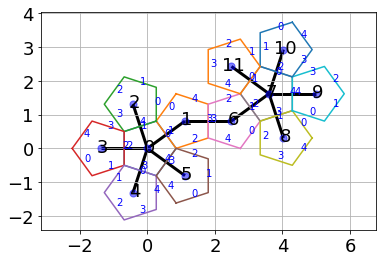

In [37]:
dodecanet.fold(reverse=True)
dodecanet.plot()

# icosahedre

In [118]:
icosanet = pn.PlanarNet(N=3,l=1)
alpha = np.pi-np.arccos(-np.sqrt(5)/3)
icosanet.tile(iedge=2, angle = alpha)
icosanet.tile(iface=1,iedge=0, angle = alpha)
icosanet.tile(iface=0,iedge=1, angle = alpha)
icosanet.tile(iface=1,iedge=2, angle = alpha)
icosanet.tile(iface=4,iedge=1, angle = alpha)
icosanet.tile(iface=4,iedge=2, angle = alpha)
icosanet.tile(iface=6,iedge=0, angle = alpha)
icosanet.tile(iface=6,iedge=2, angle = alpha)
icosanet.tile(iface=8,iedge=1, angle = alpha)
icosanet.tile(iface=8,iedge=2, angle = alpha)
icosanet.tile(iface=10,iedge=0, angle = alpha)
icosanet.tile(iface=10,iedge=2, angle = alpha)
icosanet.tile(iface=12,iedge=1, angle = alpha)
icosanet.tile(iface=12,iedge=2, angle = alpha)
icosanet.tile(iface=14,iedge=0, angle = alpha)
icosanet.tile(iface=14,iedge=2, angle = alpha)
icosanet.tile(iface=16,iedge=1, angle = alpha)
icosanet.tile(iface=16,iedge=2, angle = alpha)
icosanet.tile(iface=18,iedge=0, angle = alpha)

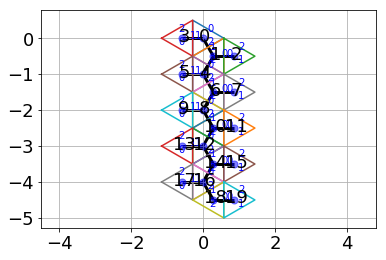

In [119]:
icosanet.plot()

In [120]:
s = icosanet.fold()

In [121]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(s.shape,update=True)

HBox(children=(Renderer(background='white', camera=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -3.2361079774997927, -2.267283942228511), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), controls=[OrbitControls(controlling=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -3.2361079774997927, -2.267283942228511), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), target=(1.6653345369377348e-16, 8.326672684688674e-16, -0.7557613140761704)), Picker(controlling=Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(60, 3), dtype=float32>, 'normal': <BufferAttribute shape=(60, 3), dtype=float32>, 'index': <BufferAttribute shape=(60,), dtype=uint32>}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'1672846b5dc64443906d41a36d815803', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), event=u'mousedown', object=None)], scene=Scene(children=(Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(60, 3), dtype=float32>, 'normal': <BufferAttribute shape=(60, 3), dtype=float32>, 'index': <BufferAttribute shape=(60,), dtype=uint32>}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'1672846b5dc64443906d41a36d815803', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), Group(quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -3.2361079774997927, -2.267283942228511), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), AmbientLight(color=u'#101010', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0))), fog=None, overrideMaterial=None, quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), shadowMap=WebGLShadowMap()), HTML(value=u'Selected shape : None')))

# Le Ballon de foot (TBC)

Le réseau plan d'un ballon de football est représenté ci-dessous. Nous allons utiliser planarnet pour le décrire et pour réaliser sa représentation 3D avec ccad.

![Ballon](http://gwydir.demon.co.uk/jo/solid/buckynet.gif)

On commence par créer un PlanarNet basé sur un hexagone (N=6) et de côté unitaire l=1

In [25]:
ball = pn.PlanarNet(N=6,l=1)

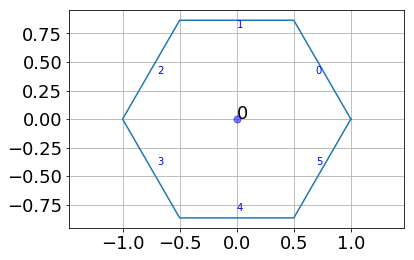

In [26]:
ball.plot()

In [27]:
ball.tile(iedge=1,angle=0.3)

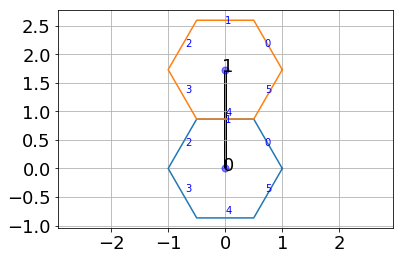

In [28]:
ball.plot()

In [29]:
ball.fold()

Volume : 0.222
Area : 2.598   Center : 0.000, 0.000 , 0.000
Area : 2.598   Center : 0.000, 1.693 , -0.256

In [30]:
j = jupyter_renderer.JupyterRenderer()
j.DisplayShape(ball.shell.shape,update=True)

HBox(children=(Renderer(background='white', camera=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -5.946178621372787, -0.7677840189010416), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), controls=[OrbitControls(controlling=PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -5.946178621372787, -0.7677840189010416), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), target=(1.1102230246251565e-16, 0.8273456687450109, -0.25592800630034723)), Picker(controlling=Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(24, 3), dtype=float32>, 'normal': <BufferAttribute shape=(24, 3), dtype=float32>, 'index': BufferAttribute(array=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=uint32))}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'e8230267f72f4cb88de98a71fbceae73', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), event=u'mousedown', object=None)], scene=Scene(children=(Group(children=(Mesh(geometry=BufferGeometry(attributes={'position': <BufferAttribute shape=(24, 3), dtype=float32>, 'normal': <BufferAttribute shape=(24, 3), dtype=float32>, 'index': BufferAttribute(array=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=uint32))}), material=MeshPhongMaterial(alphaMap=None, aoMap=None, bumpMap=None, color=u'#a6a6a6', displacementMap=None, emissiveMap=None, envMap=None, lightMap=None, map=None, normalMap=None, normalScale=(1.0, 1.0), polygonOffset=True, polygonOffsetFactor=1.0, polygonOffsetUnits=1.0, shininess=0.9, specularMap=None), name=u'e8230267f72f4cb88de98a71fbceae73', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), Group(quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), PerspectiveCamera(children=(DirectionalLight(intensity=0.9, position=(50.0, 50.0, 50.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)),), position=(0.0, -5.946178621372787, -0.7677840189010416), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 0.0, 1.0)), AmbientLight(color=u'#101010', quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0))), fog=None, overrideMaterial=None, quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), shadowMap=WebGLShadowMap()), HTML(value=u'Selected shape : None')))